# Exploratory Data Analysis

Brief introduction to Pandas, Matplotlib and Seaborn


_Francesco Mosconi, May 2016_

## 1. Data munging in Pandas

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic-train.csv")

## Quick exploration

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Indexing

In [6]:
df.ix[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [7]:
df.iloc[3]

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

In [8]:
df.loc[0:4,'Ticket']

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [9]:
df['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

## Selections

In [10]:
df[df.Age>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [11]:
df[(df.Age==11)&(df.SibSp==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S


In [12]:
df[(df.Age==11)|(df.SibSp==5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S


## Distinct Elements

In [13]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## Basic Stats

In [14]:
print df['Age'].mean()
print df['Fare'].median()
print (df['Sex'] == 'female').sum()

29.6991176471
14.4542
314


## Missing Data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
df['Age'].fillna(30)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      30.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     30.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     30.0
27     19.0
28     30.0
29     30.0
       ... 
861    21.0
862    48.0
863    30.0
864    24.0
865    42.0
866    27.0
867    31.0
868    30.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    30.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, dtype: float64

## Groupby

In [17]:
# Find average age of passengers that survived vs. died
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

## Pivot Tables

In [18]:
df.pivot_table(index='Sex', columns='Parch', values='Survived', aggfunc='sum')

Parch,0,1,2,3,4,5,6
Sex,,,,,,,
female,153.0,46.0,30.0,3.0,0.0,1.0,0.0
male,80.0,19.0,10.0,0.0,0.0,0.0,NaN


In [19]:
df.pivot_table(index='Sex', columns='SibSp', values='Survived', aggfunc='sum')

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,137,80,10,4,2,0,0
male,73,32,3,0,1,0,0


## Exercises:

- select passengers that died
- select passengers who paid less than 40.000 and were in third class
- locate the name of passegner Id 674
- count the number of survived and the number of dead passengers
- count the number of survived and dead per each gender
- calculate average price paid by survived and dead people

In [19]:
df.groupby(['Sex', 'Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

## 2. Data Visualization

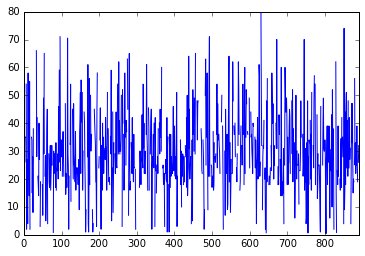

In [20]:
df.Age.plot()

Let's give it a title and bigger fonts

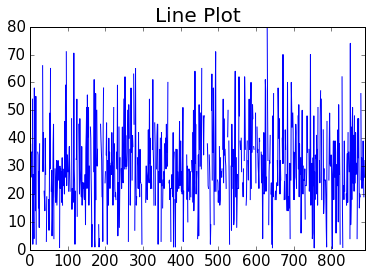

In [21]:
df.Age.plot(fontsize=15)
plt.title('Line Plot', size=20)

What if I wanted to plot the data points?

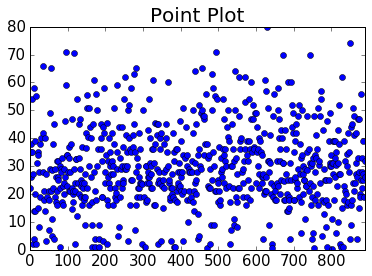

In [22]:
df.Age.plot(style='o', fontsize=15)
plt.title('Point Plot', size=20)

How about looking at the distribution of this data?

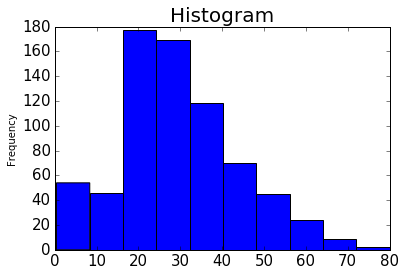

In [23]:
df.Age.plot(kind='hist', fontsize=15)
plt.title('Histogram', size=20)

Here are various plot kinds:
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot

Try doing a density plot or a box plot and see what happens.

## Exercises:
- plot the age histogram of the titanic passengers
- plot a pie chart of survived
- plot the age histogram of the two sub-populations of dead and survived passengers (in the same plot)
- plot the age histogram of the two sub-populations of male and female (in the same plot)
- plot a bar chart of the port of embarkement

## 3 Prettier plots with seaborn

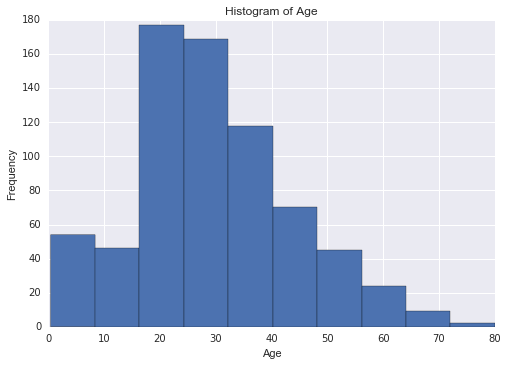

In [26]:
import seaborn as sns
df['Age'].plot(kind='hist')
plt.title('Histogram of Age')
plt.xlabel('Age')

What if I wanted to look at the influence of multiple variables on survival?

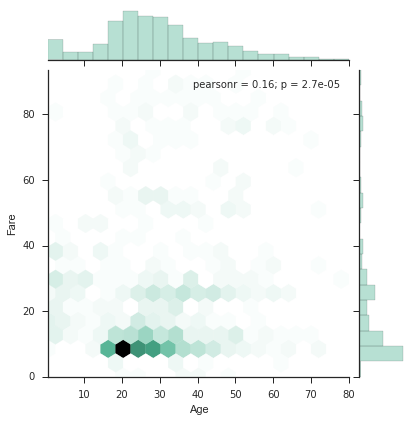

In [27]:
sns.set(style="ticks")
x = df['Age']
y = df[df['Fare'] < 100]['Fare']
sns.jointplot(x, y, kind="hex", color="#4CB391")

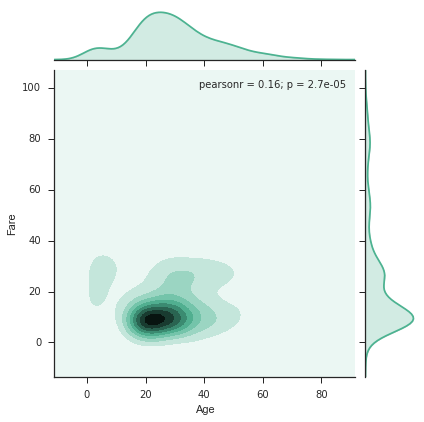

In [28]:
sns.jointplot(x, y, kind="kde", color="#4CB391")

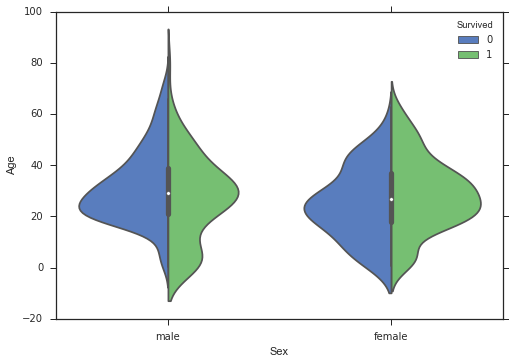

In [29]:
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, palette="muted", split=True)

## Exercise:
- Explore the [Seaborn Gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html) and try out other plot types.

Copyright © Francesco Mosconi & Dataweekends.com